In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
EPOCHS=10
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
INPUT_SHAPE=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
INPUT_SHAPE_1=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)

In [3]:
dataset=keras.preprocessing.image_dataset_from_directory(".\dataset",seed=123,label_mode='categorical',image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

Found 1030 files belonging to 5 classes.


In [4]:
class_names=dataset.class_names

In [5]:
class_names

['french_bulldog',
 'german_shepherd',
 'golden_retriever',
 'poodle',
 'yorkshire_terrier']

In [6]:
n_classes=len(class_names)

In [7]:
def dataset_get_partitions(ds,valid_size=0.1,test_size=0.1,train_size=0.8,shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size)
    valid_size=tf.cast(valid_size*ds_size,tf.int64)
    test_size=tf.cast(test_size*ds_size,tf.int64)
    train_size=tf.cast(train_size*ds_size,tf.int64)
    print(valid_size,test_size,train_size,sep='\n')
    train=ds.take(train_size)
    valid=ds.skip(train_size).take(valid_size)
    test=ds.skip(train_size).skip(valid_size).take(test_size)
    return train,valid,test

In [8]:
train_ds,valid_ds,test_ds=dataset_get_partitions(dataset)

tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(26, shape=(), dtype=int64)


MODEL (without data augmentation)

for data augmentation just ucomment the code

In [9]:
model=models.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
    # layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",),
    # layers.experimental.preprocessing.RandomRotation(0.2),
    # layers.experimental.preprocessing.RandomZoom(0.2),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=INPUT_SHAPE_1),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.Conv2D(256,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(512,  kernel_size = (3,3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [10]:
model.build(input_shape=INPUT_SHAPE_1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (32, 256, 256, 3)         0         
                                                                 
 rescaling (Rescaling)       (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (32, 123, 123, 256)       295168    
                                                        

In [11]:
model.compile(
    keras.optimizers.Adam(learning_rate=0.0001),
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],)

epoch 1-10


In [12]:
history=model.fit(train_ds,epochs=EPOCHS,validation_data=valid_ds,validation_steps=None,verbose=1)

Epoch 1/10
26/26 [==============================] - 265s 10s/step - loss: 1.6097 - accuracy: 0.2208 - val_loss: 1.6000 - val_accuracy: 0.2812
Epoch 2/10
26/26 [==============================] - 259s 10s/step - loss: 1.6005 - accuracy: 0.2730 - val_loss: 1.5952 - val_accuracy: 0.2917
Epoch 3/10
26/26 [==============================] - 271s 10s/step - loss: 1.5828 - accuracy: 0.2990 - val_loss: 1.5346 - val_accuracy: 0.3125
Epoch 4/10
26/26 [==============================] - 278s 11s/step - loss: 1.5262 - accuracy: 0.3353 - val_loss: 1.4918 - val_accuracy: 0.3438
Epoch 5/10
26/26 [==============================] - 260s 10s/step - loss: 1.4678 - accuracy: 0.3846 - val_loss: 1.5255 - val_accuracy: 0.3229
Epoch 6/10
26/26 [==============================] - 258s 10s/step - loss: 1.4150 - accuracy: 0.3918 - val_loss: 1.3479 - val_accuracy: 0.4688
Epoch 7/10
26/26 [==============================] - 257s 10s/step - loss: 1.3580 - accuracy: 0.4243 - val_loss: 1.2430 - val_accuracy: 0.4479
Epoch 

epoch 10-20

In [13]:
history2=model.fit(train_ds,epochs=EPOCHS,validation_data=valid_ds,validation_steps=None,verbose=1)

Epoch 1/10
26/26 [==============================] - 249s 9s/step - loss: 1.1266 - accuracy: 0.5447 - val_loss: 1.1043 - val_accuracy: 0.5208
Epoch 2/10
26/26 [==============================] - 251s 9s/step - loss: 1.0119 - accuracy: 0.5993 - val_loss: 0.8904 - val_accuracy: 0.6875
Epoch 3/10
26/26 [==============================] - 249s 9s/step - loss: 0.9392 - accuracy: 0.6328 - val_loss: 0.9212 - val_accuracy: 0.6250
Epoch 4/10
26/26 [==============================] - 249s 9s/step - loss: 0.8234 - accuracy: 0.6799 - val_loss: 0.7189 - val_accuracy: 0.7396
Epoch 5/10
26/26 [==============================] - 249s 9s/step - loss: 0.6872 - accuracy: 0.7333 - val_loss: 0.4640 - val_accuracy: 0.8542
Epoch 6/10
26/26 [==============================] - 249s 9s/step - loss: 0.5691 - accuracy: 0.7903 - val_loss: 0.4871 - val_accuracy: 0.8438
Epoch 7/10
26/26 [==============================] - 250s 9s/step - loss: 0.4419 - accuracy: 0.8400 - val_loss: 0.4212 - val_accuracy: 0.8542
Epoch 8/10
26

Saving a version of the model before running more epochs

In [14]:
model_version="1" # model version

In [15]:
model.save(f"models\dog_v{model_version}")

INFO:tensorflow:Assets written to: models\dog_v1\assets


INFO:tensorflow:Assets written to: models\dog_v1\assets


epoch 20-25

In [16]:
EPOCHS=5

In [17]:
history3=model.fit(train_ds,epochs=EPOCHS,validation_data=valid_ds,validation_steps=None,verbose=1)

Epoch 1/5
26/26 [==============================] - 250s 9s/step - loss: 0.1899 - accuracy: 0.9342 - val_loss: 0.1368 - val_accuracy: 0.9479
Epoch 2/5
26/26 [==============================] - 256s 10s/step - loss: 0.1345 - accuracy: 0.9555 - val_loss: 0.0587 - val_accuracy: 0.9896
Epoch 3/5
26/26 [==============================] - 249s 9s/step - loss: 0.1049 - accuracy: 0.9615 - val_loss: 0.1326 - val_accuracy: 0.9479
Epoch 4/5
26/26 [==============================] - 249s 9s/step - loss: 0.1368 - accuracy: 0.9504 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 5/5
26/26 [==============================] - 249s 9s/step - loss: 0.0658 - accuracy: 0.9826 - val_loss: 0.0231 - val_accuracy: 0.9896


trying to predict

In [18]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 14s 3s/step - loss: 0.0176 - accuracy: 1.0000


In [24]:
score=model.evaluate(dataset)

33/33 [==============================] - 91s 3s/step - loss: 0.0364 - accuracy: 0.9913


saving the model again

In [19]:
model_version="2" # model version


In [20]:
model.save(f"models\dog_v{model_version}")

INFO:tensorflow:Assets written to: models\dog_v2\assets


INFO:tensorflow:Assets written to: models\dog_v2\assets


VISUAL COMPARISON OF MODEL AT DIFFERENT STAGES

comparing the model after 10, 20 and 25 epochs

In [21]:
acc1= history.history['accuracy']
val_acc1 = history.history['val_accuracy']

loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

acc2= history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

acc3= history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']



for first 10 epochs

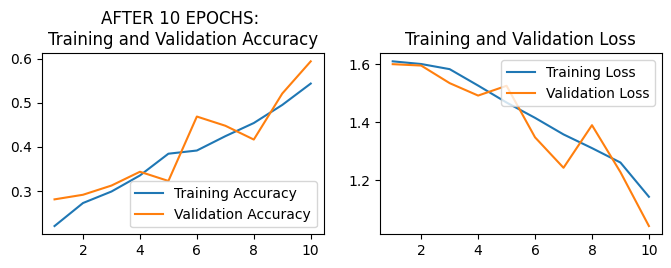

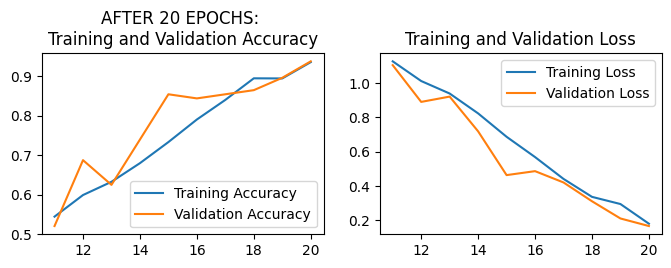

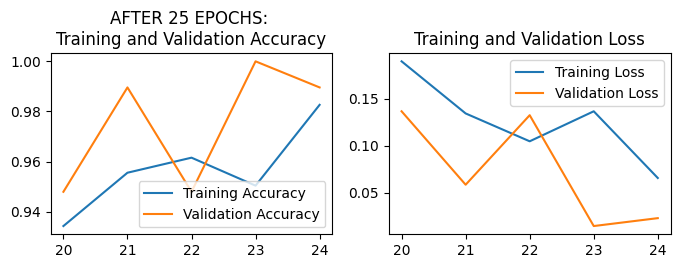

Test loss: 0.01761435903608799
Test accuracy: 1.0


In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(3, 2, 1)
plt.plot(range(1,11), acc1, label='Training Accuracy')
plt.plot(range(1,11), val_acc1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('AFTER 10 EPOCHS: \nTraining and Validation Accuracy')

plt.subplot(3, 2, 2)
plt.plot(range(1,11), loss1, label='Training Loss')
plt.plot(range(1,11), val_loss1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(3, 2, 1)
plt.plot(range(11,21), acc2, label='Training Accuracy')
plt.plot(range(11,21), val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('AFTER 20 EPOCHS: \nTraining and Validation Accuracy')

plt.subplot(3, 2, 2)
plt.plot(range(11,21), loss2, label='Training Loss')
plt.plot(range(11,21), val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(3, 2, 1)
plt.plot(range(20,25), acc3, label='Training Accuracy')
plt.plot(range(20,25), val_acc3, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('AFTER 25 EPOCHS: \nTraining and Validation Accuracy')

plt.subplot(3, 2, 2)
plt.plot(range(20,25), loss3, label='Training Loss')
plt.plot(range(20,25), val_loss3, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

1/1 [==============================] - 0s 115ms/step


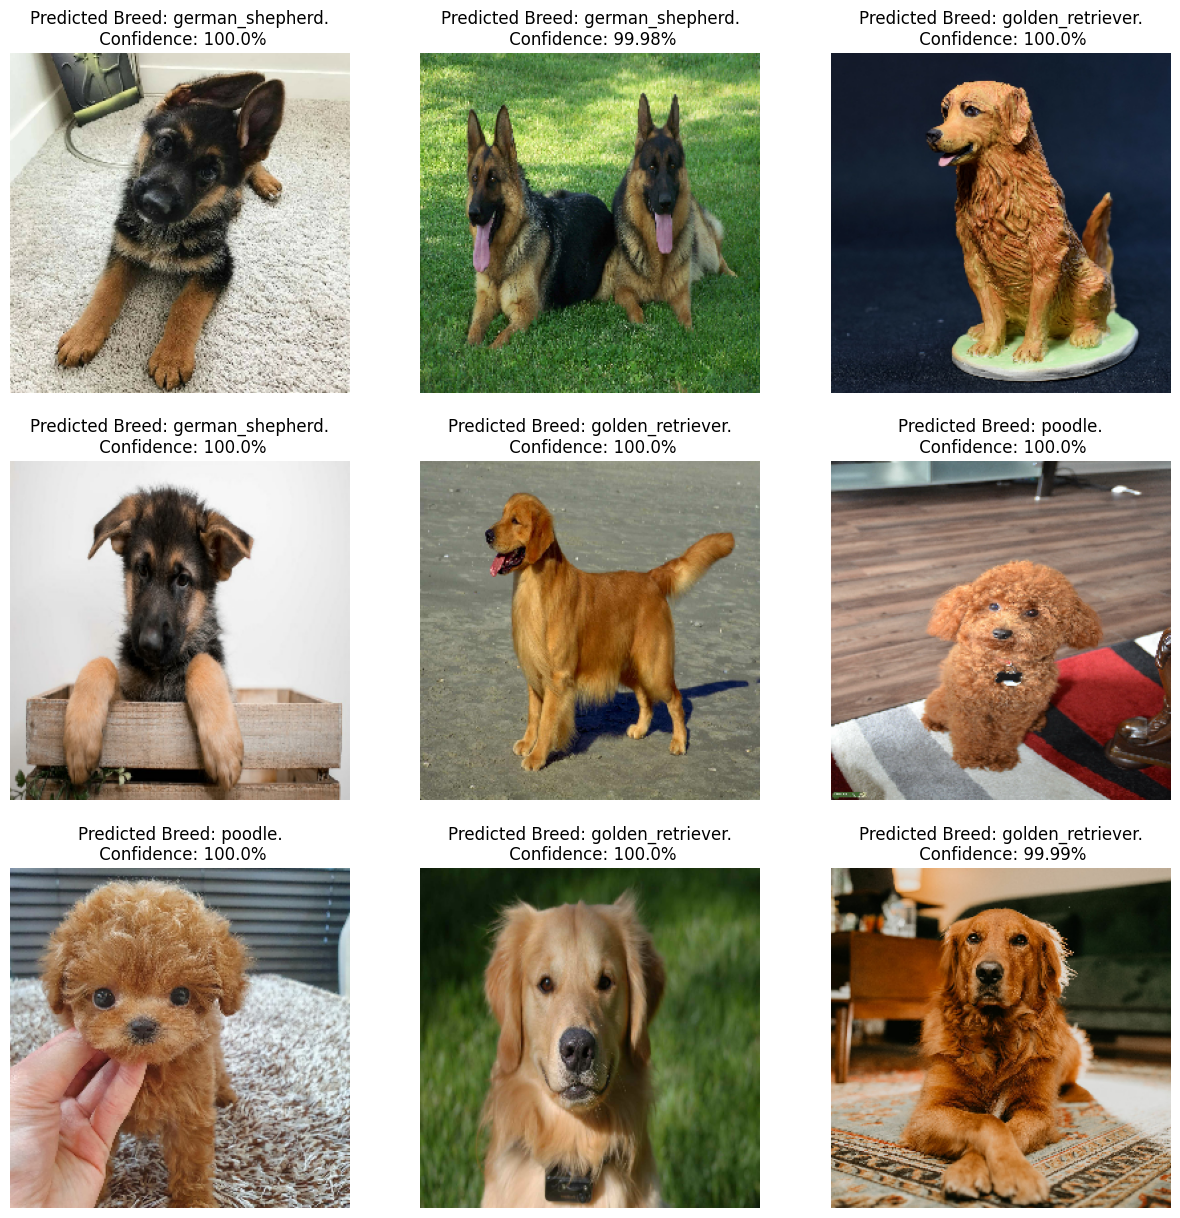

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
        img_array = tf.expand_dims(img_array, 0)

        predictions = model.predict(img_array)

        predicted_class = class_names[np.argmax(predictions[0])]
        confidence = round(100 * (np.max(predictions[0])), 2)
        
        plt.title(f"Predicted Breed: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")